## RAG

### 1. Load the data from HuggingFace

In [2]:
from datasets import load_dataset
import pandas as pd

# Load the dataset from 
ds = load_dataset("MedRAG/pubmed")

# Get the train data， first 20k samples
train_data = ds['train']

df = pd.DataFrame(train_data[:20000])

# Save the whole train data to a csv file
df.to_csv('train.csv', index=False)

### 2. Data cleaning

In [5]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_sm')

In [6]:
data_raw = pd.read_csv('train.csv')

In [7]:
data_raw.head()

,id,title,content,contents,PMID
0,pubmed23n0001_0,[Biochemical studies on camomile components/II...,(--)-alpha-Bisabolol has a primary antipeptic ...,[Biochemical studies on camomile components/II...,21
1,pubmed23n0001_1,[Demonstration of tumor inhibiting properties ...,A report is given on the recent discovery of o...,[Demonstration of tumor inhibiting properties ...,22
2,pubmed23n0001_2,Effect of etafenone on total and regional myoc...,The distribution of blood flow to the subendoc...,Effect of etafenone on total and regional myoc...,23
3,pubmed23n0001_3,Influence of a new virostatic compound on the ...,"The virostatic compound N,N-diethyl-4-[2-(2-ox...",Influence of a new virostatic compound on the ...,24
4,pubmed23n0001_4,Pharmacological properties of new neuroleptic ...,"RMI 61 140, RMI 61 144 and RMI 61 280 are newl...",Pharmacological properties of new neuroleptic ...,25


In [8]:
data_raw.iloc[0]['contents']

"[Biochemical studies on camomile components/III. In vitro studies about the antipeptic activity of (--)-alpha-bisabolol (author's transl)]. (--)-alpha-Bisabolol has a primary antipeptic action depending on dosage, which is not caused by an alteration of the pH-value. The proteolytic activity of pepsin is reduced by 50 percent through addition of bisabolol in the ratio of 1/0.5. The antipeptic action of bisabolol only occurs in case of direct contact. In case of a previous contact with the substrate, the inhibiting effect is lost."

<Axes: ylabel='Frequency'>

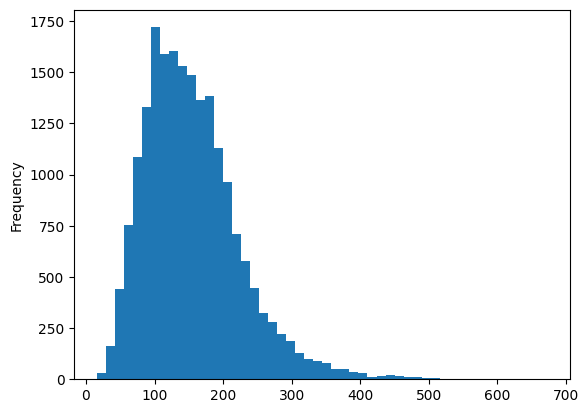

In [11]:
data_raw['contents'].apply(lambda x: len(x.split(' '))).plot(kind='hist', bins=50)

In [12]:
doc = nlp(data_raw.iloc[0]['contents'])

In [14]:
def token_to_df(doc=doc):
    token_info = []
    for token in doc:
        token_info.append({
            "Text": token.text,
            "Index": token.idx,
            "Whitespace": token.is_space,
            "Is Alphanumeric?": token.is_alpha,
            "Is Punctuation?": token.is_punct,
            "Is Stop Word?": token.is_stop
        })
    return pd.DataFrame(token_info)

token_to_df(doc)

,Text,Index,Whitespace,Is Alphanumeric?,Is Punctuation?,Is Stop Word?
0,[,0,False,False,True,False
1,Biochemical,1,False,True,False,False
2,studies,13,False,True,False,False
3,on,21,False,True,False,True
4,camomile,24,False,True,False,False
...,...,...,...,...,...,...
98,inhibiting,509,False,True,False,False
99,effect,520,False,True,False,False
100,is,527,False,True,False,True
101,lost,530,False,True,False,False


In [20]:
for token in doc:
    if str(token) != str(token.lemma_):
        print(f"{str(token):>20} : {str(token.lemma_)}")

         Biochemical : biochemical
             studies : study
          components : component
                  In : in
             studies : study
                 has : have
           depending : depend
                  is : be
              caused : cause
                  pH : ph
                 The : the
                  is : be
             reduced : reduce
                 The : the
              occurs : occur
                  In : in
          inhibiting : inhibit
                  is : be
                lost : lose


In [15]:
def clean_text(text):
    complete_doc = nlp(text)
    words = [token.text for token in complete_doc 
             if token.is_alpha and not token.is_stop and not token.is_punct]
    return ' '.join(words)

def lemmalize_text(text):
    complete_doc = nlp(text)
    words = [token.lemma_ for token in complete_doc]
    return ' '.join(words)

In [16]:
text = data_raw.iloc[0]['contents']
text = clean_text(text)
text = lemmalize_text(text)
clean_doc = nlp(text)

In [18]:
token_to_df(clean_doc).shape[0]

44

In [21]:
def tokenized_text(text):
    complete_doc = nlp(text)
    words = [token.text.lower() for token in complete_doc]
    return words

In [ ]:
raw_data['cleaned'] = (
            data_raw.loc['contents']
            .apply(clean_text)
            .apply(lemmalize_text)
            .apply(tokenized_text)
            .apply(lambda x: ' '.join(x))
        )
clean

In [ ]:
clean.apply(lambda x: len(x)).plot(kind='hist', bins=50)